<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
drive.mount('/content/drive')
%matplotlib inline



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [105]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0,0,0,454,0,0,10,0,0,0,0,454,0,0,2016-08-15T19:00:00Z,15/08/20 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0,0,0,0,0,55,FALSE,0,0
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,2016-10-30T13:30:00Z,30/10/20 13:30,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0,1,2432,2697,265,53,FALSE,0,0
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,0,454,0,0,110,0,1,0,2,6193,14.4,0,2016-11-05T15:00:00Z,05/11/20 15:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4,2,2112,2564,452,53,TRUE,0,0
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,0,454,0,0,118,0,3,0,1.3,6792,8.4,0,2016-11-19T17:30:00Z,19/11/20 17:30,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2,1,839,1671,832,53,FALSE,0,0
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,0,454,0,0,127,1,1,0,1.8,7393,10,0,2016-11-27T16:30:00Z,27/11/20 16:30,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6,1,-204,503,707,53,FALSE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46141,Zlatan_Ibrahimovic,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,50,0,0,0,0,2625,0,0,2017-09-17T15:00:00Z,17/09/20 16:00,0,0,0,0,0,7,0,0,0,0,0,0,5,0,2742,0,0,0,0,4,0,0,-292,147,439,100,TRUE,0,0
46142,Zlatan_Ibrahimovic,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,55,0,0,0,0,3171,0,0,2017-09-23T14:00:00Z,23/09/20 15:00,0,0,0,0,0,14,0,0,0,0,0,0,6,0,2953,0,0,0,1,0,0,0,-308,145,453,100,FALSE,0,0
46143,Zlatan_Ibrahimovic,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,64,0,0,0,0,3721,0,0,2017-09-30T14:00:00Z,30/09/20 15:00,0,0,0,0,0,6,0,0,0,0,0,0,7,0,2999,0,0,0,0,4,0,0,-206,136,342,100,TRUE,0,0
46144,Zlatan_Ibrahimovic,0,0,0,0,0,0,0,0,0,0,0,0,523,0,0,75,0,0,0,0,4275,0,0,2017-10-14T11:30:00Z,14/10/20 12:30,0,0,0,0,0,10,0,0,0,0,0,0,8,0,3106,0,0,0,0,0,0,0,-116,222,338,100,FALSE,0,0


In [3]:
#def configure_plotly_browser_state():
 # import IPython
 # display(IPython.core.display.HTML('''
  #      <script src="/static/components/requirejs/require.js"></script>
   #     <script>
    #      requirejs.config({
     #       paths: {
      #        base: '/static/base',
       #       plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
        #    },
         # });
        #</script>
        #'''))

In [106]:
gws=gws.astype({ 'assists':int, 'attempted_passes':int, 'big_chances_created':int,
       'big_chances_missed':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'clearances_blocks_interceptions':int, 'completed_passes':int, 'creativity':float,
       'dribbles':int, 'ea_index':int, 'element':int, 'errors_leading_to_goal':int,
       'errors_leading_to_goal_attempt':int, 'fouls':int, 'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'id':int, 'influence':float, 'key_passes':int,
      'loaned_in':int, 'loaned_out':int,'minutes':int, 'offside':int, 'open_play_crosses':int, 'opponent_team':int, 'own_goals':int,
       'penalties_conceded':int, 'penalties_missed':int, 'penalties_saved':int,
       'recoveries':int, 'red_cards':int, 'round':int, 'saves':int, 'selected':int, 'tackled':int,
       'tackles':int, 'target_missed':int, 'team_a_score':int, 'team_h_score':int, 'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
      'value':int, 'was_home':'category', 'winning_goals':'category', 'yellow_cards':int})

In [107]:
gws.dtypes

name                                 object
assists                               int64
attempted_passes                      int64
big_chances_created                   int64
big_chances_missed                    int64
bonus                                 int64
bps                                   int64
clean_sheets                       category
clearances_blocks_interceptions       int64
completed_passes                      int64
creativity                          float64
dribbles                              int64
ea_index                              int64
element                               int64
errors_leading_to_goal                int64
errors_leading_to_goal_attempt        int64
fixture                              object
fouls                                 int64
goals_conceded                        int64
goals_scored                          int64
ict_index                           float64
id                                    int64
influence                       

In [108]:
gws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46146 entries, 0 to 46145
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   name                             46146 non-null  object  
 1   assists                          46146 non-null  int64   
 2   attempted_passes                 46146 non-null  int64   
 3   big_chances_created              46146 non-null  int64   
 4   big_chances_missed               46146 non-null  int64   
 5   bonus                            46146 non-null  int64   
 6   bps                              46146 non-null  int64   
 7   clean_sheets                     46146 non-null  category
 8   clearances_blocks_interceptions  46146 non-null  int64   
 9   completed_passes                 46146 non-null  int64   
 10  creativity                       46146 non-null  float64 
 11  dribbles                         46146 non-null  int64   
 12  ea_i

In [109]:
gws.drop(['kickoff_time','ea_index'], axis=1,inplace=True)

In [110]:
gws.describe()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards
count,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.00000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.0,46146.0,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,4.614600e+04,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,46146.000000,4.614600e+04,46146.000000,4.614600e+04,46146.000000,46146.000000
mean,0.039982,14.698219,0.038790,0.029363,0.105426,6.261453,1.387054,11.590712,4.981080,0.319421,305.56824,0.005374,0.008495,0.357886,0.496294,0.043709,1.766251,11548.813765,7.321757,0.303537,0.0,0.0,32.525528,0.065531,0.098643,10.495774,0.001409,0.004031,0.001062,0.000823,2.017488,0.001734,20.323040,0.094786,1.209931e+05,0.548065,0.299744,0.159385,1.173883,1.572119,5.375742,1.355589,4.309418e+02,7515.773805,7.084187e+03,51.916222,0.055324
std,0.212882,21.738801,0.212032,0.187207,0.484947,10.034562,2.860463,18.361912,11.096715,0.878978,177.76650,0.074870,0.093877,0.783713,0.973279,0.229139,3.109952,6675.661806,13.030182,0.784194,0.0,0.0,40.714515,0.320696,0.386044,5.764301,0.037505,0.063701,0.032569,0.029431,3.134673,0.041601,11.065823,0.629457,2.689916e+05,1.253137,0.769473,0.478755,1.206861,1.322505,13.598057,2.502062,3.333952e+04,27954.923205,2.471134e+04,12.810796,0.228615
min,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.011696e+06,0.000000,0.000000e+00,38.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5772.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,4.070000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-9.910000e+02,29.000000,8.700000e+01,44.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,304.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11540.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.999900e+04,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-5.100000e+01,241.000000,7.010000e+02,48.000000,0.000000
75%,0.000000,27.000000,0.000000,0.000000,0.000000,11.000000,1.000000,19.000000,3.000000,0.000000,456.00000,0.000000,0.000000,0.000000,1.000000,0.000000,2.600000,17310.000000,11.000000,0.000000,0.0,0.0,90.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,30.000000,0.000000,1.063050e+05,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.800000e+01,2866.000000,4.576250e+03,55.000000,0.000000
max,3.000000,174.000000,3.000000,4.000000,3.000000,114.000000,28.000000,167.000000,170.900000,13.000000,683.00000,2.000000,2.000000,7.000000,7.000000,4.000000,31.

In [111]:
gws.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,15/08/20 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,30/10/20 13:30,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,05/11/20 15:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,19/11/20 17:30,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,27/11/20 16:30,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1


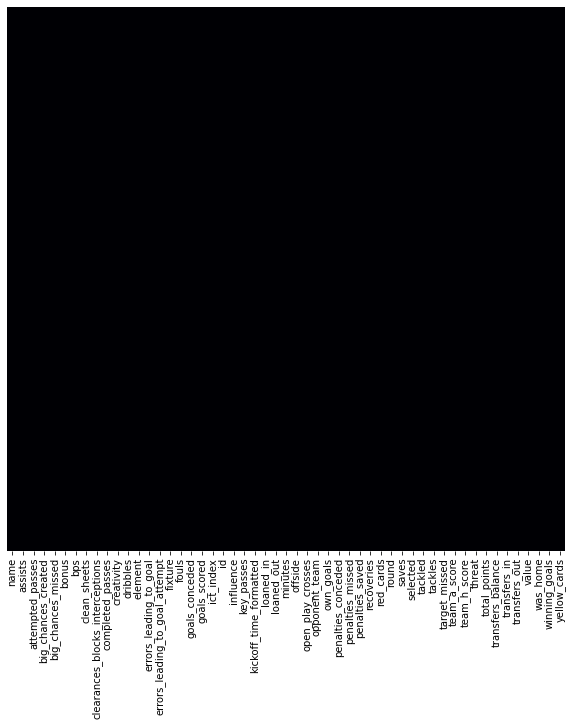

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno')

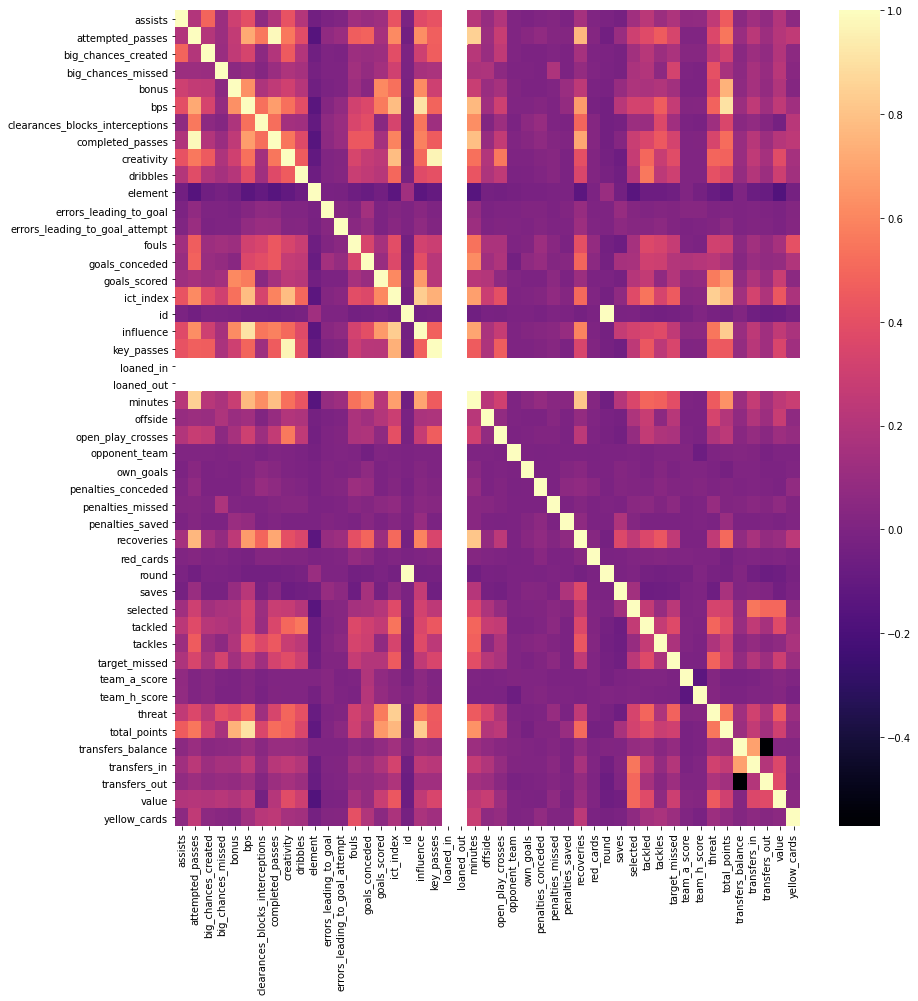

In [11]:
plt.figure(figsize=(14,15))
sns.heatmap(gws.corr(),cmap='magma')

In [12]:
gws.corr()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards
assists,1.000000,0.200580,0.485112,0.116271,0.300700,0.396176,0.061349,0.194549,0.412283,0.202866,-0.045689,-0.001245,0.011198,0.133229,0.102536,0.124551,0.417970,-0.012462,0.379027,0.414225,NaN,NaN,0.217012,0.097797,0.201199,0.007281,-0.001625,0.008891,0.018881,-0.005255,0.152460,0.011749,-0.011334,-0.026988,0.134391,0.228659,0.113505,0.181997,0.070194,0.077700,0.255516,0.454575,0.052034,0.129416,0.076206,0.200909,0.056963
attempted_passes,0.200580,1.000000,0.204945,0.115323,0.259877,0.714285,0.554448,0.987204,0.556538,0.380683,-0.158919,0.071964,0.108231,0.460487,0.480918,0.157683,0.618375,-0.049108,0.628064,0.466650,NaN,NaN,0.847340,0.112712,0.277305,0.008592,0.038929,0.068420,0.024847,0.018815,0.765618,0.027584,-0.043922,0.098285,0.305157,0.374644,0.456141,0.340344,0.005956,0.006295,0.356960,0.551863,0.104848,0.230932,0.119804,0.213960,0.252880
big_chances_created,0.485112,0.204945,1.000000,0.108884,0.257183,0.336850,0.055638,0.198014,0.450084,0.200839,-0.049420,0.000519,-0.003490,0.121333,0.098777,0.119878,0.389373,-0.003620,0.304804,0.460549,NaN,NaN,0.214757,0.100613,0.256922,0.009691,-0.001421,-0.005158,0.009726,-0.005119,0.151179,0.004660,-0.001711,-0.023977,0.138859,0.217843,0.111900,0.167092,0.031990,0.031756,0.230269,0.313001,0.042907,0.120154,0.078041,0.197632,0.056763
big_chances_missed,0.116271,0.115323,0.108884,1.000000,0.053505,0.083783,0.027864,0.106439,0.180148,0.150686,-0.029730,0.004202,0.005536,0.135899,0.080344,0.146896,0.307749,-0.008727,0.154571,0.166762,NaN,NaN,0.175211,0.181276,0.055875,0.001230,0.003369,-0.002656,0.183262,-0.004389,0.082953,0.007376,-0.007330,-0.023620,0.167546,0.201135,0.056091,0.328361,0.002723,-0.002383,0.409997,0.163371,0.057967,0.154321,0.096374,0.225436,0.040019
bonus,0.300700,0.259877,0.257183,0.053505,1.000000,0.637148,0.178172,0.245249,0.310365,0.208596,-0.053274,-0.009040,0.005080,0.120077,0.036939,0.611264,0.531842,-0.014325,0.620580,0.303004,NaN,NaN,0.282790,0.106903,0.156051,0.014699,-0.001016,-0.006039,0.009377,0.107796,0.241690,-0.006911,-0.012852,0.093133,0.178721,0.168874,0.195349,0.137078,-0.001997,-0.004776,0.367291,0.746158,0.066073,0.151298,0.082021,0.190320,0.029095
bps,0.396176,0.714285,0.336850,0.083783,0.637148,1.000000,0.529833,0.680829,0.529075,0.392447,-0.139068,0.030349,0.076526,0.318812,0.357613,0.564643,0.781417,-0.041993,0.908106,0.487768,NaN,NaN,0.767808,0.132699,0.301215,0.010501,0.005931,0.024456,0.004787,0.081457,0.674470,-0.020449,-0.038208,0.221673,0.326528,0.319514,0.462238,0.265156,0.018603,0.030203,0.482289,0.906537,0.112860,0.245746,0.125752,0.248906,0.129857
clearances_blocks_interceptions,0.061349,0.554448,0.055638,0.027864,0.178172,0.529833,1.000000,0.527277,0.145232,0.129474,-0.100476,0.063041,0.107113,0.346504,0.387001,0.045207,0.337024,-0.041622,0.548806,0.123500,NaN,NaN,0.629750,0.015038,0.119222,-0.007565,0.055922,0.092766,0.002567,-0.002242,0.492782,0.030237,-0.038987,-0.025311,0.113570,0.105182,0.366675,0.133877,-0.007004,-0.016502,0.124387,0.349706,0.046495,0.077548,0.025011,-0.033258,0.226034
completed_passes,0.194549,0.987204,0.198014,0.106439,0.245249,0.680829,0.527277,1.000000,0.549081,0.369446,-0.153307,0.060539,0.099134,0.437954,0.438939,0.148273,0.591105,-0.047023,0.587990,0.458230,NaN,NaN,0.790651,0.094564,0.263113,0.010426,0.034225,0.062661,0.021889,0.006077,0.710355,0.026603,-0.042205,0.025410,0.282610,0.353533,0.442543,0.328034,0.009556,0.012293

In [13]:
gws.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,15/08/20 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,30/10/20 13:30,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,05/11/20 15:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,19/11/20 17:30,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,27/11/20 16:30,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1


In [116]:
#from datetime import datetime as dt
gws['kickoff_time_formatted']=pd.to_datetime(gws['kickoff_time_formatted'])

In [117]:
gws.dtypes

name                                       object
assists                                     int64
attempted_passes                            int64
big_chances_created                         int64
big_chances_missed                          int64
bonus                                       int64
bps                                         int64
clean_sheets                             category
clearances_blocks_interceptions             int64
completed_passes                            int64
creativity                                float64
dribbles                                    int64
element                                     int64
errors_leading_to_goal                      int64
errors_leading_to_goal_attempt              int64
fixture                                    object
fouls                                       int64
goals_conceded                              int64
goals_scored                                int64
ict_index                                 float64


In [118]:
gws.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2020-08-15 20:00:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,2020-10-30 13:30:00,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,2020-05-11 15:00:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,2020-11-19 17:30:00,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,2020-11-27 16:30:00,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1


In [119]:

gws['kickoff_time'] = gws.kickoff_time_formatted.dt.hour


In [120]:
#gws['kickoff_time_formatted']=gws['kickoff_time_formatted'].astype(str)
gws.dtypes

name                                       object
assists                                     int64
attempted_passes                            int64
big_chances_created                         int64
big_chances_missed                          int64
bonus                                       int64
bps                                         int64
clean_sheets                             category
clearances_blocks_interceptions             int64
completed_passes                            int64
creativity                                float64
dribbles                                    int64
element                                     int64
errors_leading_to_goal                      int64
errors_leading_to_goal_attempt              int64
fixture                                    object
fouls                                       int64
goals_conceded                              int64
goals_scored                                int64
ict_index                                 float64


In [121]:
gws.head(20)

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,kickoff_time
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2020-08-15 20:00:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0,20
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,2020-10-30 13:30:00,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0,13
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,2020-05-11 15:00:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0,15
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,2020-11-19 17:30:00,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0,17
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,2020-11-27 16:30:00,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1,16
5,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,140,0,0,0,0.0,7997,0.0,0,2020-03-12 17:30:00,0,0,0,0,0,1,0,0,0,0,0,0,14,0,14484,0,0,0,5,1,0.0,0,-1707,346,2053,53,TRUE,0,0,17
6,Aaron_Cresswell,0,25,0,0,0,12,0,16,18,5.7,0,454,0,0,146,1,2,0,3.3,8602,26.6,0,2020-11-12 16:30:00,0,0,90,1,1,9,0,0,0,0,5,0,15,0,13321,1,0,1,2,2,1.0,1,-1195,163,1358,53,FALSE,0,0,16
7,Aaron_Cresswell,0,39,0,0,0,17,1,3,27,7.2,0,454,0,0,154,1,0,0,3.3,9212,8.2,0,2020-12-14 19:45:00,0,0,90,0,1,3,0,0,0,0,0,0,16,0,16068,2,0,0,0,1,18.0,6,2619,2875,256,53,TRUE,0,0,19
8,Aaron_Cresswell,0,41,0,0,1,27,1,8,33,1.8,1,454,0,1,170,0,0,0,1.7,9826,7.2,0,2020-12-17 15:00:00,0,0,90,0,0,7,0,0,0,0,8,0,17,0,19517,1,0,0,0,1,8.0,7,3143,3422,279,53,TRUE,0,0,15
9,Aaron_Cresswell,0,39,0,0,0,12,0,6,30,11.7,0,454,0,0,179,0,1,0,3.2,10442,20.6,1,2020-12-26 15:00:00,0,0,90,0,0,16,0,0,0,0,6,0,18,0,19658,2,0,0,4,1,0.0,2,-104,1033,1137,53,FALSE,0,0,15


In [122]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'


In [123]:
gws['kickoff_time']=gws['kickoff_time'].apply(time)
gws.head(20)

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,kickoff_time
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,2020-08-15 20:00:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0,2
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,2020-10-30 13:30:00,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0,1
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,2020-05-11 15:00:00,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0,1
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,2020-11-19 17:30:00,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0,1
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,2020-11-27 16:30:00,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1,1
5,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,140,0,0,0,0.0,7997,0.0,0,2020-03-12 17:30:00,0,0,0,0,0,1,0,0,0,0,0,0,14,0,14484,0,0,0,5,1,0.0,0,-1707,346,2053,53,TRUE,0,0,1
6,Aaron_Cresswell,0,25,0,0,0,12,0,16,18,5.7,0,454,0,0,146,1,2,0,3.3,8602,26.6,0,2020-11-12 16:30:00,0,0,90,1,1,9,0,0,0,0,5,0,15,0,13321,1,0,1,2,2,1.0,1,-1195,163,1358,53,FALSE,0,0,1
7,Aaron_Cresswell,0,39,0,0,0,17,1,3,27,7.2,0,454,0,0,154,1,0,0,3.3,9212,8.2,0,2020-12-14 19:45:00,0,0,90,0,1,3,0,0,0,0,0,0,16,0,16068,2,0,0,0,1,18.0,6,2619,2875,256,53,TRUE,0,0,2
8,Aaron_Cresswell,0,41,0,0,1,27,1,8,33,1.8,1,454,0,1,170,0,0,0,1.7,9826,7.2,0,2020-12-17 15:00:00,0,0,90,0,0,7,0,0,0,0,8,0,17,0,19517,1,0,0,0,1,8.0,7,3143,3422,279,53,TRUE,0,0,1
9,Aaron_Cresswell,0,39,0,0,0,12,0,6,30,11.7,0,454,0,0,179,0,1,0,3.2,10442,20.6,1,2020-12-26 15:00:00,0,0,90,0,0,16,0,0,0,0,6,0,18,0,19658,2,0,0,4,1,0.0,2,-104,1033,1137,53,FALSE,0,0,1


In [126]:
gws.drop(['kickoff_time_formatted'],axis=1,inplace=True)

In [128]:
gws.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,kickoff_time
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0.0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0.0,0,0,0,0,55,FALSE,0,0,2
1,Aaron_Cresswell,0,41,0,0,0,12,0,1,35,7.9,0,454,0,0,92,0,2,0,1.3,5595,5.4,0,0,0,90,0,1,6,0,0,0,0,3,0,10,0,12638,0,0,0,0,2,0.0,1,2432,2697,265,53,FALSE,0,0,1
2,Aaron_Cresswell,0,30,0,0,0,13,0,4,23,1.9,0,454,0,0,110,0,1,0,2.0,6193,14.4,0,0,0,90,1,0,14,0,0,0,0,3,0,11,0,15004,1,2,0,1,1,4.0,2,2112,2564,452,53,TRUE,0,0,1
3,Aaron_Cresswell,0,37,0,0,0,13,0,2,29,2.8,1,454,0,0,118,0,3,0,1.3,6792,8.4,0,0,0,90,0,0,17,0,0,0,0,4,0,12,0,16187,0,1,0,2,3,2.0,1,839,1671,832,53,FALSE,0,0,1
4,Aaron_Cresswell,0,24,0,0,0,7,0,4,16,1.7,0,454,0,0,127,1,1,0,1.8,7393,10.0,0,0,0,90,0,0,11,0,0,0,0,6,0,13,0,16093,1,1,0,1,1,6.0,1,-204,503,707,53,FALSE,0,1,1


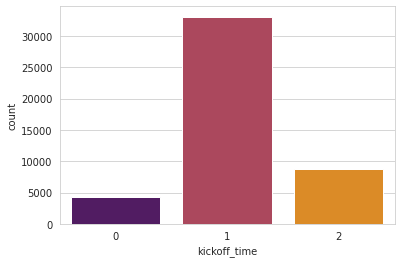

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='kickoff_time', data=gws,palette='inferno')

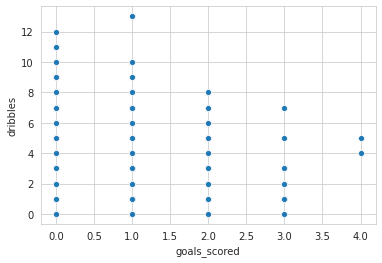